In [1]:
import csv 
import pandas as pd
import os
import numpy as np

In [11]:
files_path=os.path.join(os.getcwd(), "Queries")
files_list= os.listdir(files_path)
files_list=[file_name for file_name in files_list if not file_name.endswith("_cleaned.csv") and file_name.rstrip(".csv").isdigit()] #to select only the files named '1.csv','2.csv','3.csv'..etc
files_full_path=[os.path.join(files_path, i) for i in files_list]

In [12]:
files_list
files_full_path

['/home/rajib/Workspace/Python/Wish Na/Queries/7.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/10.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/4.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/3.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/12.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/2.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/1.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/11.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/5.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/8.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/6.csv',
 '/home/rajib/Workspace/Python/Wish Na/Queries/9.csv']

# 1. Clean the Files

In [13]:
import io
def apo_cleaner(input_csv_path,start_line_value=7,include_header=True):
    '''

    Libs used here: csv

    Files needed cleaning because:
    1. The file has the first (6) rows as info on the file.
    2. The file had its last rows as info on the day index (date) and page views.
    3. The file had rows that were not queries, but only resources used inside the website.
    
    Inputs:
    
    input_csv_path : String. Full path of csv file.
    start_line_value : Integer. Number of row where column headers are.
    include_header : Boolean. Whether to inlcude the header in the cleaned file
    
    
    '''
    cntr=0                 #Loop Counter to count rows. In case we need to index any rows.
    #start_line_value       #Line at which the data starts (after info on the file)
    rows_with_problems=[]   #Rows with problems. Should be empty after resolving all the problems with the rows. Made for debugging.
    non_useful_rows=[]      #Rows with no queries (resources inside the website)
    

    #-------------------------------------------------------------------------------------------------------#
    #THE NEXT LINE OF CODE WILL GENERATE AN ERROR IN PYTHON 2, PLEASE CHECK THIS TO FIX IT: 
    # https://stackoverflow.com/questions/3348460/csv-file-written-with-python-has-blank-lines-between-each-row
    #-------------------------------------------------------------------------------------------------------#

    with open(input_csv_path, 'r') as inp, open(input_csv_path[:-4]+'_cleaned.csv', 'w') as out:
    #Replace the next line with the previous line for Python 2.7
#     with io.open(input_csv_path, 'r',encoding='utf-8') as inp, io.open(input_csv_path[:-4]+'_cleaned.csv', 'w',encoding='utf-8',newline='') as out:
        #Note the UTF-8 encoding up. The default here is ascii, but will cause problems with queries like: ðŸ‘ŒðŸ¼
        writer = csv.writer(out)
        for row in csv.reader(inp):
            
            #debug#print(cntr)
            cntr+=1

            #Write the Columns First:
            if (cntr==start_line_value and include_header):
                writer.writerow(row)

            #Check for links:
            if(cntr > start_line_value and len(row)>0):
                link=row[0]

                if(link==''): #Then, we reached the end of the links.
                    break
#                 elif(cntr>start_line_value): #We have links after this row. Before is just file info.

#                     if((link.find('search-apo'))!=-1): #That is just to skip the lines where there is no link.
#                         to_check=link.find('search-apo')+len('search-apo') #check the position after the 'search-apo'
#                         if(len(link)<=to_check):
#                             writer.writerow(row) #Zero length query. Include it. 
#                         elif(link[to_check]!='/'):
#                             non_useful_rows.append(cntr)
#                             if(link[to_check]!='?'):
#                                 print('Weird! Line #',cntr,'This is a link with no "\" nor "?" after search-apo.. what is it ?: \n',link)
#                             #debug#print('Here is a non_useful row, because there is no query:\n',link)
#                         else:
#                              try:
#                                     writer.writerow(row)
#                              except:
#                                     rows_with_problems.append(cntr)
#                     else:
#                         non_useful_rows.append(cntr)
#                         print('Weird ! Line #',cntr,' This is a link with no search-apo, please check it out and solve the issue:',link)
    
                writer.writerow(row)
                
                
        if len(rows_with_problems) !=0:
            print('Please note that rows: ', rows_with_problems,'have problems.')
            
        print('Rows ended at:',cntr)
        print('Total rows with queries:',cntr-start_line_value-len(non_useful_rows)-1)
        return cntr-start_line_value-len(non_useful_rows)-1 #-1 since the last line is not included, -1 for the header line (in start line value)

#### 1.1  Cleaning the Files:

In [63]:
#Clean Files, Reading header with first file only:

files_full_path.sort()
file_cntr=0 #Count Files, starting at first file=1 (not zero..it increments in the first loop before reading the file.)
total_useful_rows=0


for file_path in files_full_path:
    file_cntr+=1
    print('File #',file_cntr)
    total_useful_rows+=apo_cleaner(file_path,start_line_value=7,include_header=True)
        
print('\n\n------------------------------------------------------------------------------')
print('Therefore there is a total of',total_useful_rows,'rows with queries in the',len(files_full_path),'files.')
        
    

File # 1
Rows ended at: 5008
Total rows with queries: 5000
File # 2
Rows ended at: 5008
Total rows with queries: 5000
File # 3
Rows ended at: 5008
Total rows with queries: 5000
File # 4
Rows ended at: 1345
Total rows with queries: 1337
File # 5
Rows ended at: 5008
Total rows with queries: 5000
File # 6
Rows ended at: 5008
Total rows with queries: 5000
File # 7
Rows ended at: 5008
Total rows with queries: 5000
File # 8
Rows ended at: 5008
Total rows with queries: 5000
File # 9
Rows ended at: 5008
Total rows with queries: 5000
File # 10
Rows ended at: 5008
Total rows with queries: 5000
File # 11
Rows ended at: 5008
Total rows with queries: 5000
File # 12
Rows ended at: 5008
Total rows with queries: 5000


------------------------------------------------------------------------------
Therefore there is a total of 56337 rows with queries in the 12 files.


#### 1.2 Query Length Functions

In [15]:

# def get_query(link):
#     start_pos=link.find('search-apo')+len('search-apo')+1
#     link_after_start_pos=link[start_pos:]
#     if(link_after_start_pos.find('?')!=-1):
#         end_pos=len(link[:start_pos])+link_after_start_pos.find('?')
#     else:
#         end_pos=len(link)
#     return link[start_pos:end_pos]


# def get_query_length(link):
#     return len(link.split())

#### 1.3  Merging the cleaned files:

In [16]:
new_files_list=os.listdir(files_path)
cleaned_files_list=[file_name for file_name in new_files_list if file_name.find('cleaned')!=-1]
cleaned_files_full_path=[files_path+'/'+ f for f in cleaned_files_list]
df = pd.concat([pd.read_csv(f) for f in cleaned_files_full_path], ignore_index = True, sort= False)
# df['Query Length']=df['Search Query'].apply(get_query_length)
df['Query Length']=df['Search Query'].apply(lambda x: len(str(x).split()))
df.tail()


,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length
56332,where does all the tax money go,google / organic,0,1,0.00%,11.0,7
56333,where does australian tax money go,google / organic,0,2,0.00%,4.0,6
56334,where does halal certification money go,google / organic,0,6,0.00%,65.0,6
56335,where does my tax go,google / organic,0,31,0.00%,10.0,5
56336,where does my tax money go,google / organic,0,19,0.00%,12.0,6


# 2 َQuery Info:

#### 2.1 Get Query Length

In [17]:
#Get Query Length and sort data by query length. 
#This is not userful for session purposes, only for demonstration. We will use
    #the original df for our next steps.
sorted_df=df.sort_values(by='Query Length')

sorted_df.to_csv (files_path+'/Sorted_All.csv', index = None, header=True)
sorted_df.head()

,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length
26846,mclnerney,google / organic,0,7,0.00%,1.7,1
5712,13.5*1.3,google / organic,0,2,0.00%,70.0,1
48528,ittima,google / organic,0,3,0.00%,5.0,1
2059,cityswitch,google / organic,0,3,0.00%,26.0,1
2056,cityofsouthperth,google / organic,0,1,0.00%,42.0,1


In [18]:
# GET PERCENTAGE OF QUERIES <= 19 words:
limit=19
# tem_dict=dict(df)
# lengths=np.array(tem_dict['Query Length'])

# cntr=len(lengths[lengths<=limit])
cntr = len(df[df["Query Length"] <= 19])/len(df)
        
print (str(cntr*100)[:5],'% of the queries have length less than or equal',limit,'.' )

99.44 % of the queries have length less than or equal 19 .


#### 2.2 N-gram Fingerprint

* 1. change all characters to their lowercase representation 
* 2. remove all punctuation, whitespace, and control characters
* 3. normalize extended western characters to their ASCII representation
* 4. obtain all the string n-grams
* 5. sort the n-grams and remove duplicates
* 6. join the sorted n-grams back together

In [21]:
## The N-gram fingerprinting method algorithm we follow here is the one given by OpenRefine Python Module (Previously GoogleRefine)
    #here : https://github.com/OpenRefine/OpenRefine/wiki/Clustering-In-Depth
#This link was also helpful: https://github.com/finnp/ngram-fingerprint
import string
import unicodedata


def get_n_gram_fingerprint(input_query,n=2):

    #1. change all characters to their lowercase representation
    lowered=input_query.lower()

    #2. remove all punctuation, whitespace, and control characters
    stripped=lowered.strip() #remove leading and trailing whitespaces
    remove_list=string.punctuation+' ' #list of characters to remove: punctuations and white spaces
    no_punct=[character for character in lowered if (character not in remove_list)  ] #create list of needed characters
    no_punct=''.join(no_punct) # join them into one string



    #3. normalize extended western characters to their ASCII representation (for example "gödel" → "godel")
    #import unicodedata
    normalized=unicodedata.normalize('NFKD', no_punct).encode('ascii','ignore').decode("utf-8")
    #source: https://stackoverflow.com/questions/3194516/replace-special-characters-with-ascii-equivalent

    #4. obtain all the string n-grams
    n_grams= get_n_grams(normalized,n)


    #5. sort the n-grams and remove duplicates
    sorted_n_grams=np.unique(n_grams[:]) #remove duplicates
    sorted_n_grams.sort() #sort tokens

    #6. join the sorted n-grams back together
    key= ''.join(sorted_n_grams)
    
    return key

In [22]:
def get_one_gram_fingerprint(input_query):
    return get_n_gram_fingerprint(input_query,n=1)

def get_two_gram_fingerprint(input_query):
    return get_n_gram_fingerprint(input_query,n=2)
  
def get_three_gram_fingerprint(input_query):
    return get_n_gram_fingerprint(input_query,n=3)

#### Apply

In [23]:
# df['Query']=df['Page'].apply(get_query)
df['KeyWord']=df['Search Query'].apply(get_one_gram_fingerprint)
df['2-gram fingerprint']=df['Search Query'].apply(get_two_gram_fingerprint)
df['3-gram fingerprint']=df['Search Query'].apply(get_three_gram_fingerprint)

In [24]:
df.head()

,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length,KeyWord,2-gram fingerprint,3-gram fingerprint
0,buy kids quad bikes in melbourne,google / organic,0,2,0.00%,98.0,6,abdeiklmnoqrsuy,adbibobudbdselesidikinkekilbmenenmouqurnsisqua...,adbbikboubuydbidsqelbesiidsikeinmkeskidlbomeln...
1,buy new units westmead,google / organic,0,1,0.00%,60.0,4,abdeimnstuwy,adbueaesewitmenenistswtmtsunuywewuyn,buyeadestewuitsmeanewnitstmswetmetswuniuynwesw...
2,buy paro robot,google / organic,0,1,0.00%,99.0,3,aboprtuy,arbobuoborotparouyyp,arobotbuyobooroparrobroruypypa
3,buy pedder johnson walker plain,google / organic,0,7,0.00%,56.0,5,abdehijklnoprsuwy,aialbudddeederhninjokelalknsnwohonpeplrjrpsouy...,ainalkbuyddederedderjerphnsjohkerlailkensonwao...
4,buy pentobarbital,google / organic,0,1,0.00%,16.0,2,abeilnoprtuy,alarbabibuenitntobperbtatouyyp,arbbarbitbuyentitantoobapenrbitaltobuypype


#### 2.3 Peter Norvig's Spelling Correction

source: https://norvig.com/spell-correct.html



In [25]:
#from: https://norvig.com/spell-correct.html

import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [26]:
def correct_query(query):
  return ' '.join([correction(wrd) for wrd in words(query)])

#### **Apply**
#NOOOOOOOOOOOOOOOOOOOOTEEEE::: If you have the file "All_With_Info.csv", just load it.
  #Do not do execute the next two cells, they take 20 mins.

In [154]:
#NOOOOOOOOOOOOOOOOOOOOTEEEE::: If you have the file "All_With_Info.csv", just load it.
  #Do not do execute the next two cells, they take 20 mins.
  

In [155]:
# df.to_csv ('All_With_Info.csv', index = None, header=True)


In [27]:
# df['Norvig-Spell-Corrected']=df['Search Query'].apply(correct_query)

In [28]:
df['Norvig-Spell-Corrected'] = pd.read_csv(os.path.join(files_path, 'All_With_Info.csv'))["Norvig-Spell-Corrected"]

In [64]:
# df.to_csv (os.path.join(files_path, 'All_With_Info.csv'), index = None, header=True)
df.head()

,Search Query,Source/Medium,Clicks,Impressions,CTR,Average Position,Query Length,KeyWord,2-gram fingerprint,3-gram fingerprint,Norvig-Spell-Corrected
0,buy kids quad bikes in melbourne,google / organic,0,2,0.00%,98.0,6,abdeiklmnoqrsuy,adbibobudbdselesidikinkekilbmenenmouqurnsisqua...,adbbikboubuydbidsqelbesiidsikeinmkeskidlbomeln...,buy kiss quand bites in melbourne
1,buy new units westmead,google / organic,0,1,0.00%,60.0,4,abdeimnstuwy,adbueaesewitmenenistswtmtsunuywewuyn,buyeadestewuitsmeanewnitstmswetmetswuniuynwesw...,buy new units westmead
2,buy paro robot,google / organic,0,1,0.00%,99.0,3,aboprtuy,arbobuoborotparouyyp,arobotbuyobooroparrobroruypypa,buy part root
3,buy pedder johnson walker plain,google / organic,0,7,0.00%,56.0,5,abdehijklnoprsuwy,aialbudddeederhninjokelalknsnwohonpeplrjrpsouy...,ainalkbuyddederedderjerphnsjohkerlailkensonwao...,buy redder johnson walker plain
4,buy pentobarbital,google / organic,0,1,0.00%,16.0,2,abeilnoprtuy,alarbabibuenitntobperbtatouyyp,arbbarbitbuyentitantoobapenrbitaltobuypype,buy pentobarbital


# 3 Query Cleaning: 
<br/>

* Step1:
In the paper, 'Uniqueness' of a query is defined as having different "KeyWords" in the same "Session". The Keyword in the paper is defined using the n-gram fingerprint, but n is not clearly defined, however, both 1-gram and 2-gram are mentioned. <br/>
We test both to '1-gram' and '2-gram' fingerprints to determine what is suitable for out usage. It is worth noting here that our definition of "Same Session" is: the query before, if having the same source/medium. <br/> 
We hence suggest that 1-gram will produce better results than the 2-gram since the 1-gram method detects simple spelling mistakes, while two gram detects simple spelling mistakes along with accounting for the letters being repeated extensively, which is not likely in the same session. 

* Step2:
Similar to the paper, we find that queries of length <=19 form 99.84% of the queries, so we consider queries of length> 19 as outliers.

In [30]:
## GET HISTOGRAM
lengths = df["Query Length"].values
inds=np.array(range(np.max(lengths)+1))
hist_=np.zeros(inds.shape, dtype="int64")
for leng in lengths:
  hist_[leng]+=1
  
hist_

array([    0,  1505, 11019, 18085, 13504,  6276,  2810,  1302,   647,
         341,   180,    86,    83,    48,    42,    26,    25,    22,
          10,    12,    11,    17,     8,    14,    14,     8,    10,
          14,     7,     1,     8,     9,     6,     5,     7,    11,
          12,     8,     6,    18,    21,     9,    12,     8,     7,
           1,     5,     1,     1,     2,     2,     2,     1,     1,
           2,     0,     1,     0,     0,     0,     0,     1,     0,
           0,     0,     0,     2,     0,     1,     1,     0,     0,
           1,     1,     0,     1,     1,     1,     1,     0,     2,
           1,     1,     1,     1,     1,     0,     0,     0,     0,
           1,     1,     2,     0,     1,     0,     0,     0,     0,
           0,     1,     0,     0,     1,     1,     0,     0,     1,
           0,     0,     0,     0,     2,     0,     1,     2,     2,
           2,     0,     0,     0,     0,     0,     1,     0,     0,
           1,     1,

#### 3.1 Remove Outliers

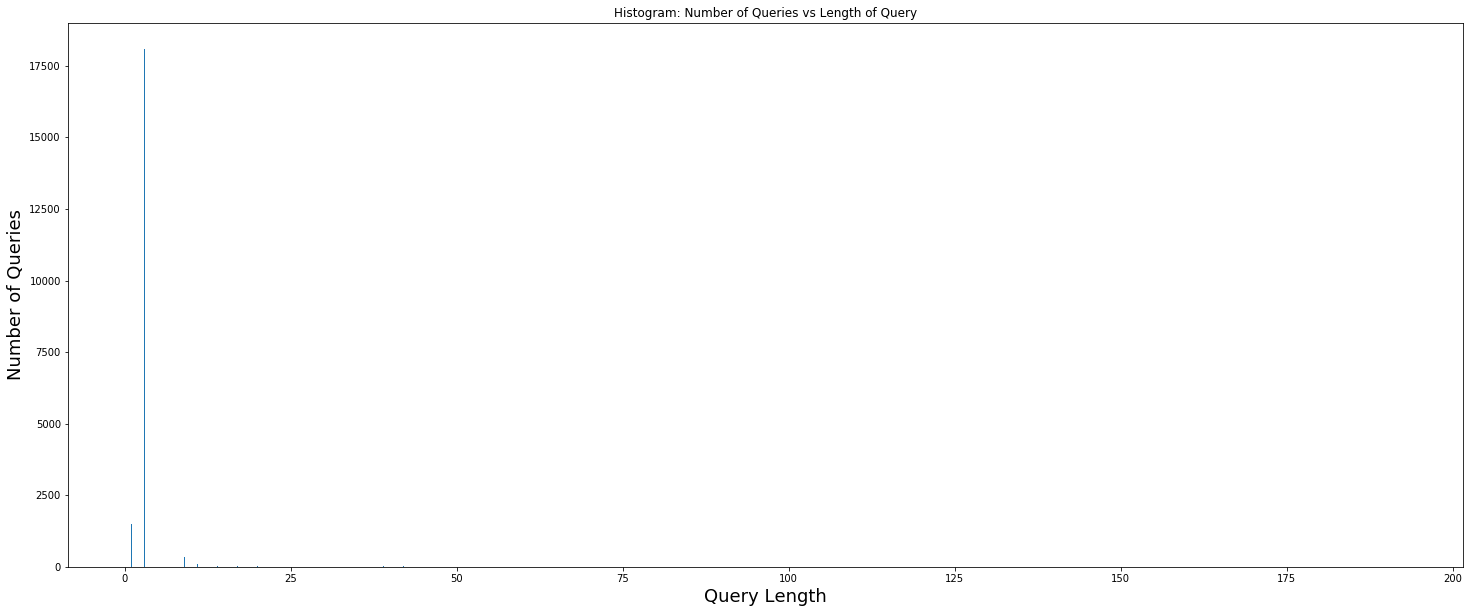

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
_ = plt.hist(lengths, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram: Number of Queries vs Length of Query")
plt.xlabel('Query Length',fontsize=18)
plt.ylabel('Number of Queries',fontsize=18)
plt.show()

In [33]:
no_outliers=df[df['Query Length']<=limit]
no_outliers.to_csv(os.path.join(files_path, 'No_Outliers.csv'), index = None, header=True)
print ('Number of rows left after removing outliers is:', len(no_outliers))

Number of rows left after removing outliers is: 56023


#### 3.2 Keep Unique Only

In [34]:
our_dict=dict(no_outliers) #our_dict=dict(df)


indices_of_non_repeated_1_gram=[]
indices_of_non_repeated_2_gram=[]
indices_of_non_repeated_3_gram=[]
indices_of_non_repeated_p_norvig=[]

indices_of_repeated_1_gram=[]
indices_of_repeated_2_gram=[]
indices_of_repeated_3_gram=[]
indices_of_repeated_p_norvig=[]


Queries=list(our_dict['Search Query'])
KeyWords=list(our_dict['KeyWord'])
bi_grams=list(our_dict['2-gram fingerprint'])
tri_grams=list(our_dict['3-gram fingerprint'])
norvigs=list(our_dict['Norvig-Spell-Corrected'])
session_types=list(our_dict['Source/Medium'])


In [35]:
#1-gram
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((KeyWords[i-1]==KeyWords[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_1_gram.append(i)
    if ((KeyWords[i-1]==KeyWords[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_1_gram.append(i)
        
        
#2-gram
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((bi_grams[i-1]==bi_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_2_gram.append(i)
    if ((bi_grams[i-1]==bi_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_2_gram.append(i)
        
        
        
#3-gram
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((tri_grams[i-1]==tri_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_3_gram.append(i)
    if ((tri_grams[i-1]==tri_grams[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_3_gram.append(i)
        
        
#norvigs
for i in range(1,len(KeyWords)): #1 is used here since session length is one before  
    if not ((norvigs[i-1]==norvigs[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(Queries[i])
        indices_of_non_repeated_p_norvig.append(i)
    if ((norvigs[i-1]==norvigs[i])  and 
       (session_types[i-1]==session_types[i])):
        #debug#print(i+2,Queries[i]) #i+2 is the index in the excel sheet. i is the index in df
        indices_of_repeated_p_norvig.append(i)

In [36]:
Cleaned_Queries_1_gram=no_outliers.iloc[indices_of_non_repeated_1_gram]
Cleaned_Queries_2_gram=no_outliers.iloc[indices_of_non_repeated_2_gram]
Cleaned_Queries_3_gram=no_outliers.iloc[indices_of_non_repeated_3_gram]
Cleaned_Queries_p_norvig=no_outliers.iloc[indices_of_non_repeated_p_norvig]

In [37]:
print ("According to 1-gram, there are "+str(len(indices_of_repeated_1_gram))+" repeated queries.")
print ("According to 2-gram, there are "+str(len(indices_of_repeated_2_gram))+" repeated queries.")
print ("According to 3-gram, there are "+str(len(indices_of_repeated_3_gram))+" repeated queries.")
print ("According to p_norvig's method, there are "+str(len(indices_of_repeated_p_norvig))+" repeated queries.")

According to 1-gram, there are 1650 repeated queries.
According to 2-gram, there are 221 repeated queries.
According to 3-gram, there are 200 repeated queries.
According to p_norvig's method, there are 240 repeated queries.


In [38]:
len(Cleaned_Queries_3_gram)

55822

In [39]:
#Detected by Peter Norvig's but not detected by 1-gram:
len([x for x in indices_of_repeated_p_norvig if x not in indices_of_repeated_1_gram])

155

# IMPORTANT:
## The difference between 1-gram and 2/3-gram
These are things that 1-gram detected as repeated but 2-gram and 3-gram did not.

In [40]:
different_indices=[x for x in indices_of_repeated_1_gram if x not in indices_of_repeated_2_gram ]
for indx in different_indices: 
  print (Queries[indx-1])
  print (Queries[indx])
  print ("---------------------------------")
  #11

buy tiny house australia
buy tiny houses australia
---------------------------------
ca australian political party
ca party australian politics
---------------------------------
cadbury australia halal
cadbury halal australia
---------------------------------
calabrian mafia australia
calabrian mafia in australia
---------------------------------
campbelltown housing
campbelltown housing commission
---------------------------------
camperdown postcode vic
camperdown victoria postcode
---------------------------------
canadian consulate brisbane
canadian consulate canberra
---------------------------------
canadian consulate in melbourne
canadian consulate melbourne
---------------------------------
canberra crime rates
canberra crime statistics
---------------------------------
canberra fertility
canberra fertility rate
---------------------------------
canberra hospital emergency wait times
canberra hospital emergency waiting times
---------------------------------
canopy tree
canopy 

---------------------------------
white collar criminal defence lawyer sydney
white collar criminal defence sydney
---------------------------------
who won the election in victoria
who won the election victoria
---------------------------------
why did the anzacs land at gallipoli
why did the anzacs land in gallipoli
---------------------------------
why is multiculturalism important
why is multiculturalism important in australia
---------------------------------
why is multiculturalism important in australia
why is multiculturalism important in schools?
---------------------------------
wikimedia commens
wikimedia commons
---------------------------------
wilsons security brisbane
wilsons security canberra
---------------------------------
wok and roll nedlands
wok n roll nedlands
---------------------------------
women's prisons australia
women's prisons in australia
---------------------------------
work rights for international students in australia
work rights in australia for in

---------------------------------
event cinemas indooroopilly session times
event cinemas indooroopilly times
---------------------------------
event cinemas macquarie
event cinemas macquarie centre
---------------------------------
event signage maitland
event signs maitland
---------------------------------
events cinema indooroopilly
events cinema indooroopilly movie times
---------------------------------
events cinema macquarie movie times
events cinema macquarie session times
---------------------------------
example of data analysis in qualitative research
example of data analysis in qualitative research proposal
---------------------------------
example of qualitative research question
example of qualitative research questions
---------------------------------
examples of citizen journalism
examples of citizen journalism in action
---------------------------------
examples of nonverbal communication in the classroom
examples of nonverbal cues in the classroom
------------------

In [41]:
Cleaned_Queries_1_gram.to_csv(os.path.join(files_path, 'Cleaned_Queries_1_gram.csv'), index = None, header=True)
Cleaned_Queries_2_gram.to_csv(os.path.join(files_path, 'Cleaned_Queries_2_gram.csv'), index = None, header=True)
Cleaned_Queries_3_gram.to_csv(os.path.join(files_path, 'Cleaned_Queries_3_gram.csv'), index = None, header=True)

#### 3.3 Internal Vs External

##### 3.3.1 All

In [42]:
our_dict=dict(no_outliers)
session_types=list(our_dict['Source/Medium'])
internal_all_indices=[]
external_all_indices=[]
for i in range(len(session_types)):  
    if (session_types[i].find('(direct)')!=-1): #if internal
        #debug#print(i+2,session_types[i]) #i+2 is the index in the excel sheet. i is the index in df
        internal_all_indices.append(i)
    else: #external
        external_all_indices.append(i)

In [43]:
print (len(internal_all_indices+external_all_indices))

56023


In [44]:
internal_all_df=no_outliers.iloc[internal_all_indices]
internal_all_df.to_csv(os.path.join(files_path, 'internal_all_queries.csv'), index = None, header=True)
external_all_df=no_outliers.iloc[external_all_indices]
external_all_df.to_csv(os.path.join(files_path, 'external_all_queries.csv'), index = None, header=True)

In [45]:
internal_all_df.describe()

,Clicks,Average Position,Query Length
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [46]:
external_all_df.describe()
# df.head()

,Clicks,Average Position,Query Length
count,56023.000000,56023.000000,56023.000000
mean,0.017136,58.140198,3.640273
std,0.359878,26.694280,1.667570
min,0.000000,1.000000,1.000000
25%,0.000000,39.000000,3.000000
50%,0.000000,59.000000,3.000000
75%,0.000000,79.000000,4.000000
max,59.000000,270.000000,19.000000


##### 3.3.2 Clean (Unique)

In [47]:
Cleaned_Queries=Cleaned_Queries_3_gram
cleaned_queries_dict=dict(Cleaned_Queries)
session_types_unique=list(cleaned_queries_dict['Source/Medium'])
internal_indices=[]
external_indices=[]
for i in range(len(session_types_unique)):  
    if (session_types_unique[i].find('(direct)')!=-1): #if internal
        #debug#print(i+2,session_types[i]) #i+2 is the index in the excel sheet. i is the index in df
        internal_indices.append(i)
    else: #external
        external_indices.append(i)

In [48]:
internal_clean_df=Cleaned_Queries.iloc[internal_indices]
internal_clean_df.to_csv(os.path.join(files_path, 'internal_clean_queries.csv'), index = None, header=True)
external_clean_df=Cleaned_Queries.iloc[external_indices]
external_clean_df.to_csv(os.path.join(files_path, 'external_clean_queries.csv'), index = None, header=True)

In [49]:
external_clean_df.describe()
# df.head()

,Clicks,Average Position,Query Length
count,55822.000000,55822.000000,55822.000000
mean,0.017162,58.167984,3.640393
std,0.360476,26.693124,1.660739
min,0.000000,1.000000,1.000000
25%,0.000000,39.000000,3.000000
50%,0.000000,59.000000,3.000000
75%,0.000000,79.000000,4.000000
max,59.000000,270.000000,19.000000


# NEW: Most Frequent Words

In [50]:
query_list=our_dict['Search Query'].tolist()
query_list=[x.lower() for x in query_list]
query_text=' '.join(query_list)

In [51]:
dict_counted_words=Counter(words(query_text))
import operator
#sort words by their count:
sorted_counted_words=sorted(dict_counted_words.items(), key=operator.itemgetter(1),reverse=True)
#remove those words:
stop_words=set(['and','of','the','in','on','for','to','s'])
sorted_counted_words_cleaned=[x for x in sorted_counted_words if x[0] not in stop_words]

In [62]:
top_n=20
# #print top_n:
# print(sorted_counted_words_cleaned[:top_n])
most_frequent_words_df = pd.DataFrame({"Words": [t[0] for t in sorted_counted_words_cleaned ], "Counts": [t[1] for t in sorted_counted_words_cleaned]}).head(top_n)
sorted_word_counts_df.to_csv(os.path.join(files_path, 'frequent_words.csv'), index = None, header=True)

In [59]:
pd.DataFrame({"Words": [t[0] for t in sorted_counted_words_cleaned ], "Counts": [t[1] for t in sorted_counted_words_cleaned]})

,Words,Counts
0,australia,4688
1,australian,1598
2,sydney,1450
3,pdf,1278
4,nsw,1072
5,is,912
6,research,875
7,health,868
8,melbourne,851
9,what,764


In [60]:
import csv

with open('list_of_most_common_words.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(['Word','Count'])
    for tuple_d in sorted_counted_words_cleaned[:top_n]:
      wr.writerow([tuple_d[0],tuple_d[1]])

In [61]:
print ("We have "+str(len(query_list))+" quereies. Only "+str(len(set(query_list)))+" of them are unique.")
print ("We have "+str(len(set(words(query_text))))+" unique words.")

We have 56023 quereies. Only 56023 of them are unique.
We have 21519 unique words.


# 4 Reproducing Graphs and Tables

#### 4.1 Table 8

In [183]:
#internal
internal_unique_mean=internal_clean_df.mean()['Query Length']
internal_all_mean=internal_all_df.mean()['Query Length']

#external
external_unique_mean=external_clean_df.mean()['Query Length']
external_all_mean=external_all_df.mean()['Query Length']

In [184]:
print ('Average Number of Words per Query')
print ('------------------------------------------------')
print ('  -Internal-                -External-         -')
print ('  _____________________     ____________________')
print ('|   All          Unique       All         Unique |')
print ('|   '+str(internal_all_mean)[:4]+'           '+str(internal_unique_mean)[:4]+'      '+str(external_all_mean)[:4]+'          '+str(external_unique_mean)[:4]+'  |')
print ('|------------------------------------------------|')


Average Number of Words per Query
------------------------------------------------
  -Internal-                -External-         -
  _____________________     ____________________
|   All          Unique       All         Unique |
|   nan           nan      3.58          3.58  |
|------------------------------------------------|


#### 4.2 Figure 5 and Figure 6

In [205]:
lengths=np.array(range(19))

#internal
internal_clean_counts=np.array(list(internal_clean_df.groupby('Query Length').count()['Search Query']))
internal_clean_counts=internal_clean_counts*100/np.sum(internal_clean_counts,axis=0)

old_internal_all_counts=np.array(list(internal_all_df.groupby('Query Length').count()['Search Query']))
old_internal_all_counts=old_internal_all_counts*100/np.sum(old_internal_all_counts,axis=0)
internal_all_counts=np.zeros(19)
for i in range(19):
    if(i<16 and i < len(internal_all_counts) and i < len(old_internal_all_counts)):
        internal_all_counts[i]=old_internal_all_counts[i]
    elif(i==16 and i < len(internal_all_counts)):
        internal_all_counts[i]=0
    elif(i < len(old_internal_all_counts) and i < len(internal_all_counts)):
        internal_all_counts[i+1]=old_internal_all_counts[i]

#external
external_clean_counts=np.array(list(external_clean_df.groupby('Query Length').count()['Search Query']))
external_clean_counts=external_clean_counts*100/np.sum(external_clean_counts,axis=0)

external_all_counts=np.array(external_all_df.groupby('Query Length').count()['Search Query'].values)
external_all_counts=external_all_counts*100/np.sum(external_all_counts,axis=0)


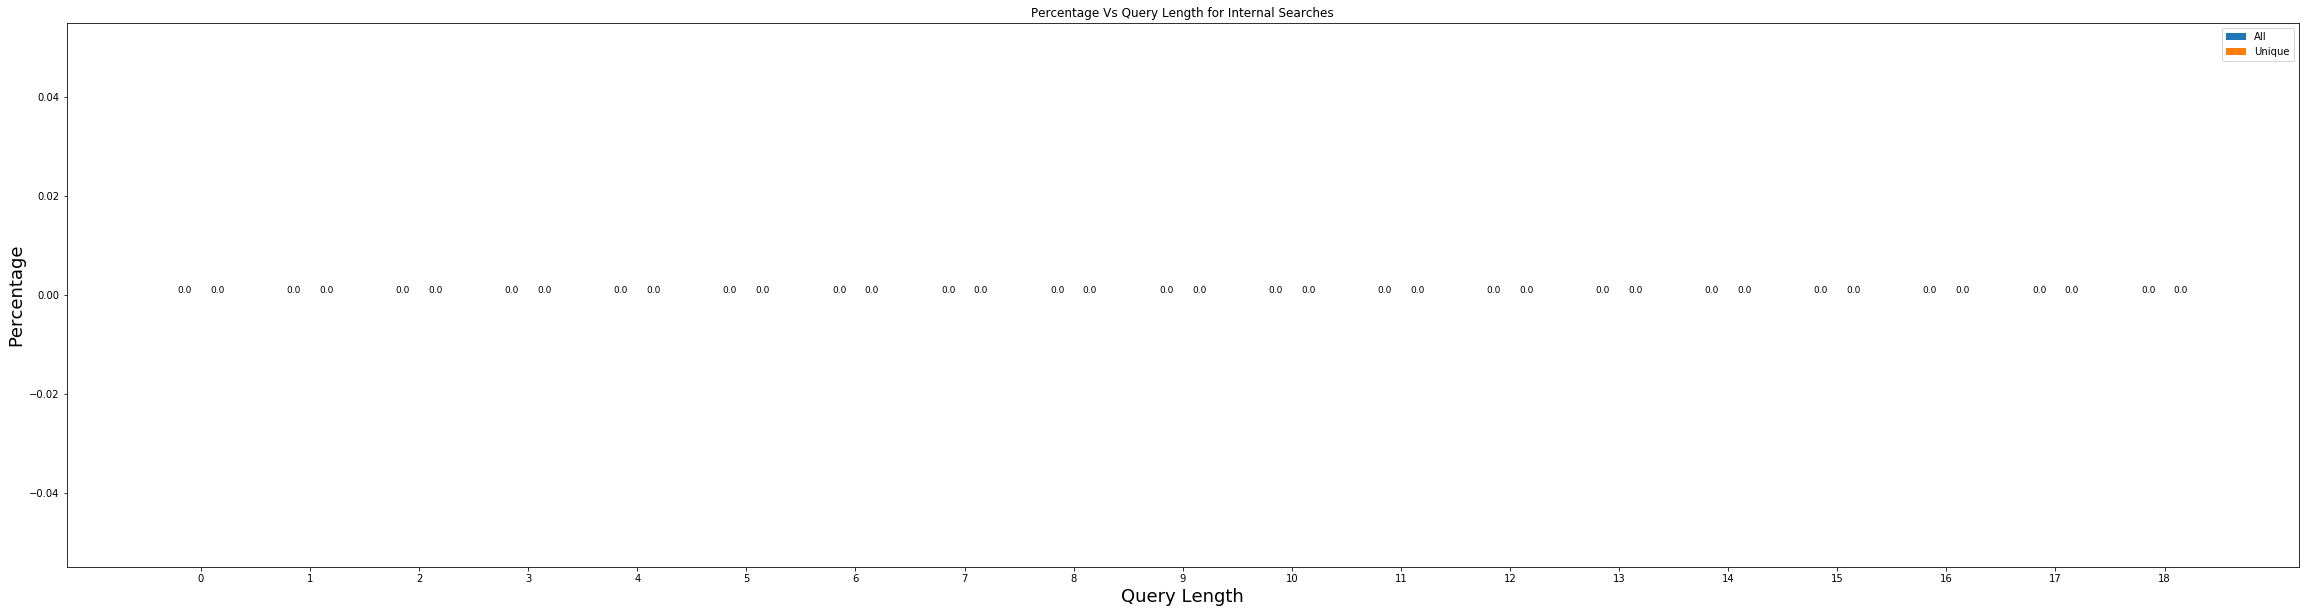

In [208]:

#FIGURE 5:

fig, ax = plt.subplots(figsize=(40,10))



ind = lengths   # the x locations for the groups
width = 0.3      # the width of the bars
p1 = ax.bar(ind, internal_all_counts, width, bottom=0 )
p2 = ax.bar(ind + width, internal_clean_counts, width, bottom=0)



ax.set_title('Percentage Vs Query Length for Internal Searches')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(lengths)
plt.xlabel('Query Length', fontsize=18)

plt.ylabel('Percentage',  fontsize=18)

ax.legend((p1[0], p2[0]), ('All', 'Unique'))
ax.autoscale_view()


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.1f' % float(height),
                ha='center', va='bottom' , fontsize=9)

autolabel(p1)
autolabel(p2)

plt.show()

In [91]:
lengths

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

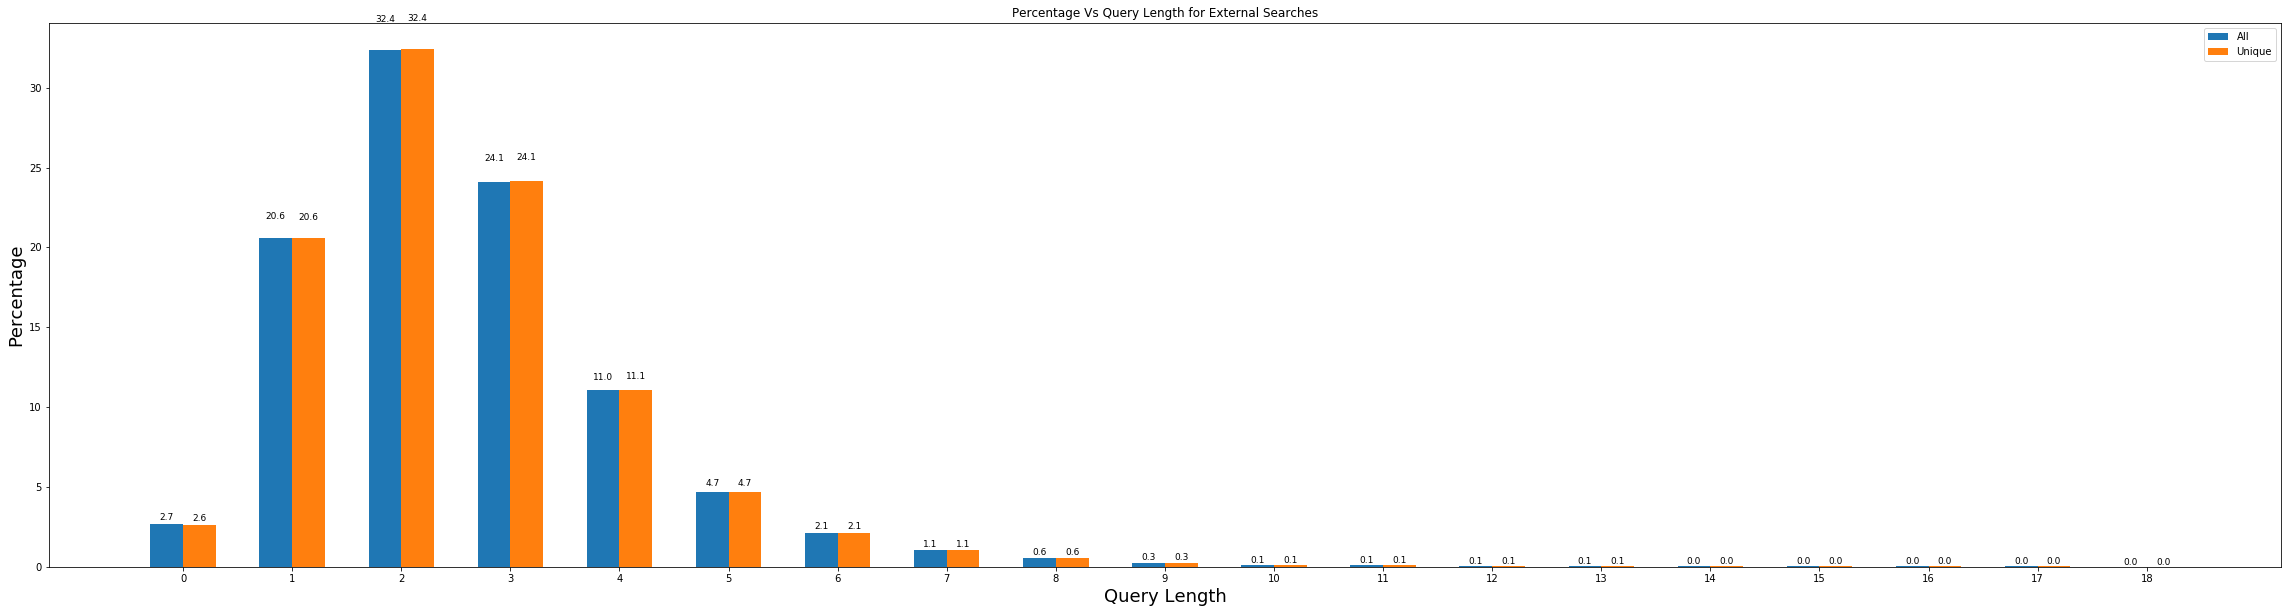

In [207]:

#FIGURE 6:

fig, ax = plt.subplots(figsize=(40,10))



ind = lengths    # the x locations for the groups
width = 0.3      # the width of the bars
p1 = ax.bar(ind, external_all_counts, width, bottom=0 )
p2 = ax.bar(ind + width, external_clean_counts, width, bottom=0)


ax.set_title('Percentage Vs Query Length for External Searches')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(lengths)
plt.xlabel('Query Length', fontsize=18)

plt.ylabel('Percentage',  fontsize=18)

ax.legend((p1[0], p2[0]), ('All', 'Unique'))
ax.autoscale_view()


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % float(height),
                ha='center', va='bottom' , fontsize=9)

autolabel(p1)
autolabel(p2)

plt.show()

In [ ]:
'''
- Percent is the percentage of queries containing that number of terms relative to the total
number of queries

- 1-gram avoids:
    #Seplling mistakes resulting from swapping two letters (as in paper)
    #repeating any word by mistake
'''

In [ ]:
external_clean_counts